# Project3 - Personal Loan Campaign

## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

## Objective

To build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Key Questions

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

### Data Description

The data contains the different attributes of liability customers. The detailed data dictionary is given below.

#### Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

#### Import necessary libraries

In [738]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [620]:
customers = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [621]:
data = customers.copy()

<IPython.core.display.Javascript object>

In [622]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [623]:
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

In [624]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [625]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [626]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [627]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

In [628]:
data.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Converting zipcodes to geographical county

In [629]:
from uszipcode import SearchEngine


def convert_zip_to_city(col_value):
    # print(col_value)
    if col_value is None:
        return
    sr = SearchEngine()
    z = sr.by_zipcode(col_value)

    if z is None:
        data.ZIPCode.replace(col_value, int(data["ZIPCode"].median()), inplace=True)
        z = sr.by_zipcode(int(data["ZIPCode"].median()))

    return z.to_dict()["county"]


# print(convert_zip_to_city(96651))
# data["ZIPCode"] = data["ZIPCode"].apply(find_incorrect_zipcodes)
data["County"] = data["ZIPCode"].apply(convert_zip_to_city)
data["County"]

0         Los Angeles County
1         Los Angeles County
2             Alameda County
3       San Francisco County
4         Los Angeles County
                ...         
4995           Orange County
4996        San Diego County
4997          Ventura County
4998      Los Angeles County
4999           Orange County
Name: County, Length: 5000, dtype: object

<IPython.core.display.Javascript object>

In [631]:
def convert_education(col_value):
    if col_value == 1:
        return "Undergrad"
    elif col_value == 2:
        return "Graduate"
    else:
        return "Professional"


data["Education"] = data["Education"].apply(convert_education)

<IPython.core.display.Javascript object>

In [632]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1,Los Angeles County


<IPython.core.display.Javascript object>

In [633]:
def log_transformation(val):
    if isinstance(val, float):  # checks if `val` is a float
        multiplier = 1000  # 1 Thousand  = 1000 dollars
        return np.log(val * multiplier + 1)
    elif isinstance(val, int):  # checks if `val` is a int
        return np.log(val + 1)
    else:
        np.nan


data["Income_log"] = data["Income"].apply(log_transformation)
data["CCAvg_log"] = data["CCAvg"].apply(log_transformation)

data.head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_log,CCAvg_log
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0,Los Angeles County,3.912023,7.378384
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0,Los Angeles County,3.555348,7.313887
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0,Alameda County,2.484907,6.908755
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0,San Francisco County,4.615121,7.901377
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1,Los Angeles County,3.828641,6.908755


<IPython.core.display.Javascript object>

In [634]:
data["Family"].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

<IPython.core.display.Javascript object>

#### Treating negative values in Experience column

In [635]:
def treat_negative_values(col_value):
    if col_value < 0:
        return 0
    else:
        return col_value


data["Experience"] = data["Experience"].apply(treat_negative_values)

<IPython.core.display.Javascript object>

#### Converting age to mulitple bins

In [637]:
# using pd.cut() function to create bins
data["Age_bins"] = pd.cut(
    data["Age"],
    bins=[20, 25, 35, 45, 55, 70],
    labels=["<=25", "25-35", "35-45", "45-55", ">=55"],
    right=False,
)

<IPython.core.display.Javascript object>

In [638]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_log,CCAvg_log,Age_bins
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0,Los Angeles County,3.912023,7.378384,25-35
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0,Los Angeles County,3.555348,7.313887,45-55
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0,Alameda County,2.484907,6.908755,35-45
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0,San Francisco County,4.615121,7.901377,35-45
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1,Los Angeles County,3.828641,6.908755,35-45


<IPython.core.display.Javascript object>

In [639]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.00000
Experience,5000.0,20.119600,11.440484,0.000000,10.000000,20.000000,30.000000,43.00000
Income,5000.0,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.00000
ZIPCode,5000.0,93169.443200,1755.115774,90005.000000,91911.000000,93437.000000,94608.000000,96150.00000
Family,5000.0,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.00000
CCAvg,5000.0,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.00000
Mortgage,5000.0,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.00000
Personal_Loan,5000.0,0.096000,0.294621,0.000000,0.000000,0.000000,0.000000,1.00000
Securities_Account,5000.0,0.104400,0.305809,0.000000,0.000000,0.000000,0.000000,1.00000
CD_Account,5000.0,0.060400,0.238250,0.000000,0.000000,0.000000,0.000000,1.00000


<IPython.core.display.Javascript object>

# Visualization

## Univariate Analysis

In [640]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

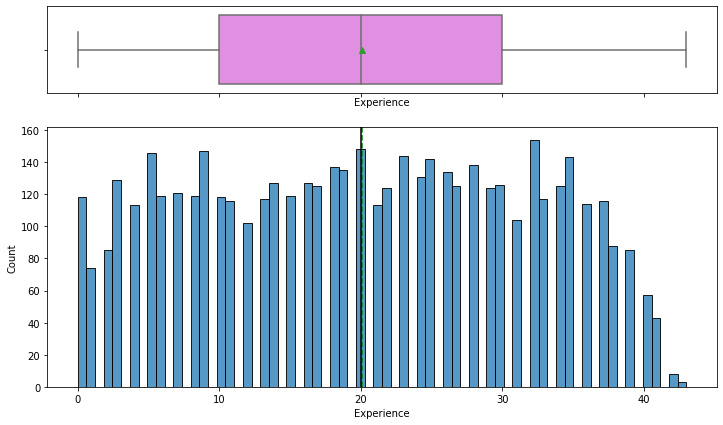

<IPython.core.display.Javascript object>

In [641]:
histogram_boxplot(data, "Experience", bins=70)

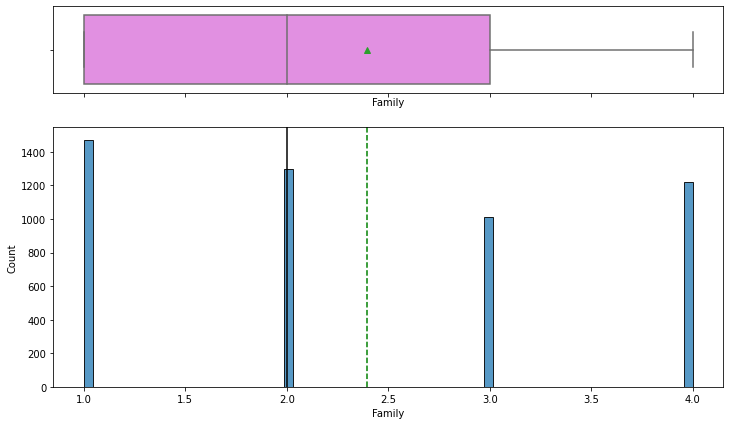

<IPython.core.display.Javascript object>

In [642]:
histogram_boxplot(data, "Family", bins=70)

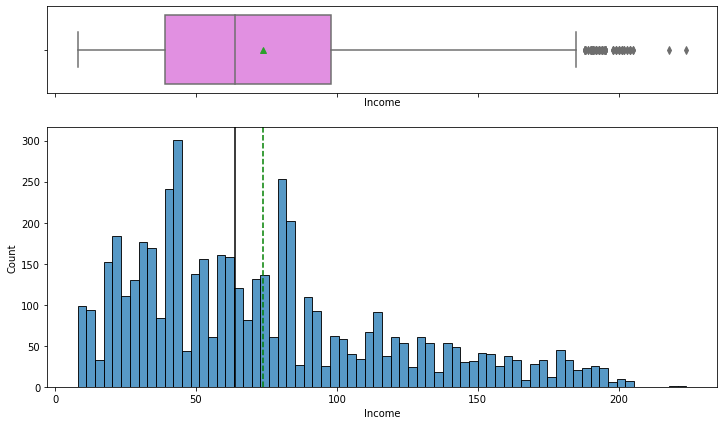

<IPython.core.display.Javascript object>

In [643]:
histogram_boxplot(data, "Income", bins=70)

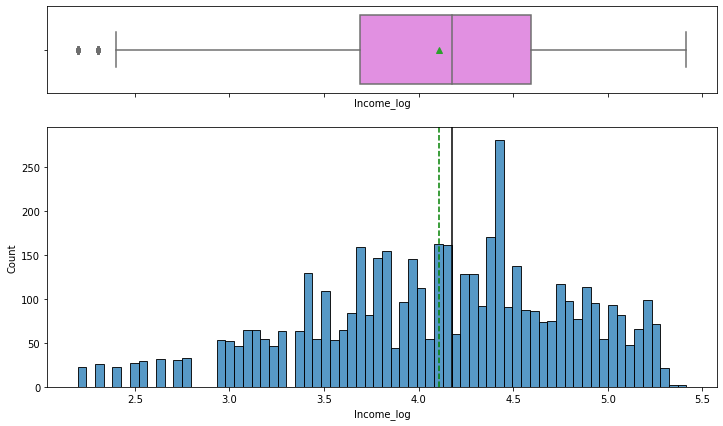

<IPython.core.display.Javascript object>

In [644]:
histogram_boxplot(data, "Income_log", bins=70)

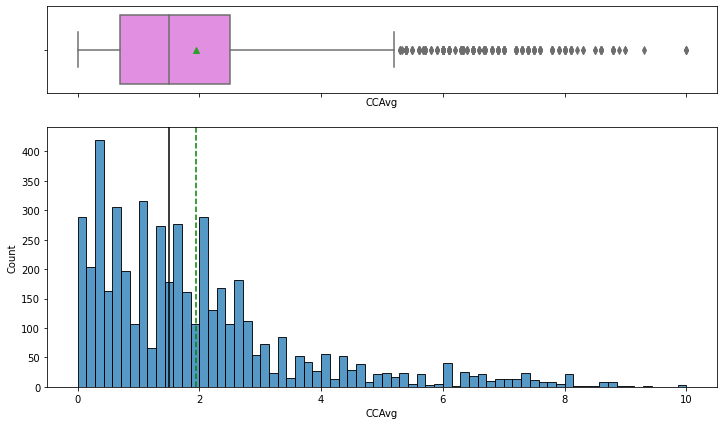

<IPython.core.display.Javascript object>

In [645]:
histogram_boxplot(data, "CCAvg", bins=70)

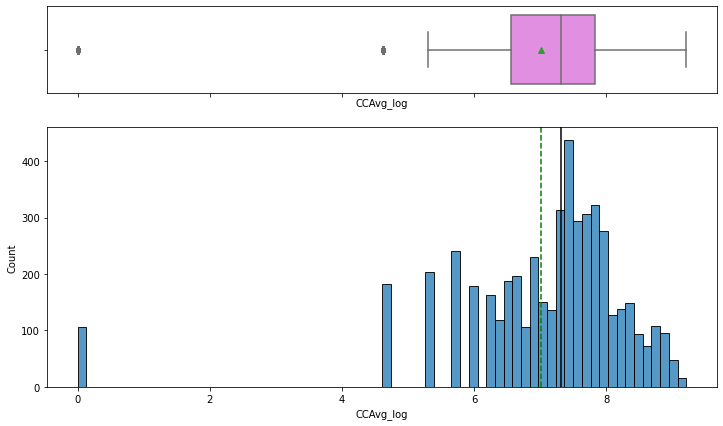

<IPython.core.display.Javascript object>

In [646]:
histogram_boxplot(data, "CCAvg_log", bins=70)

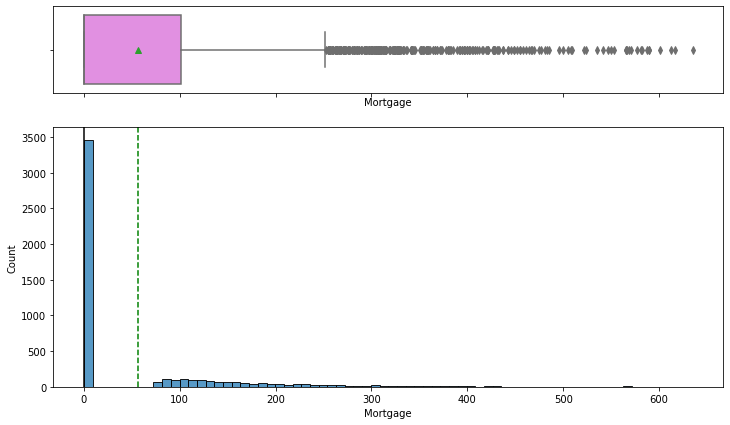

<IPython.core.display.Javascript object>

In [647]:
histogram_boxplot(data, "Mortgage", bins=70)

In [648]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

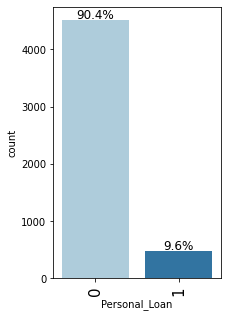

<IPython.core.display.Javascript object>

In [649]:
labeled_barplot(data, "Personal_Loan", perc=True)

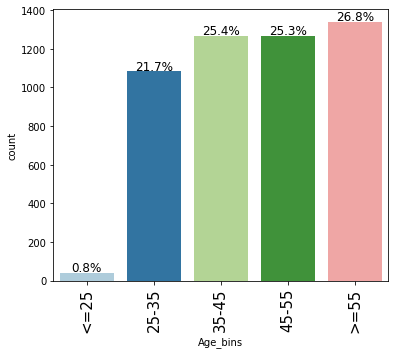

<IPython.core.display.Javascript object>

In [650]:
labeled_barplot(data, "Age_bins", perc=True)

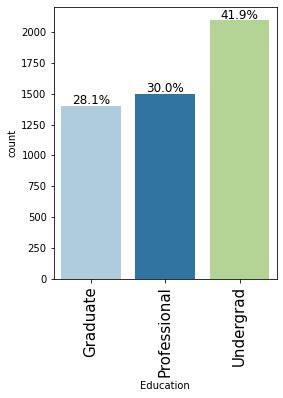

<IPython.core.display.Javascript object>

In [651]:
labeled_barplot(data, "Education", perc=True)

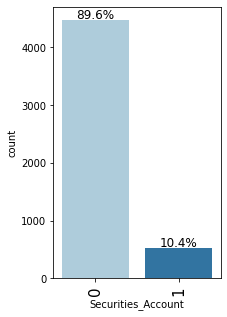

<IPython.core.display.Javascript object>

In [652]:
labeled_barplot(data, "Securities_Account", perc=True)

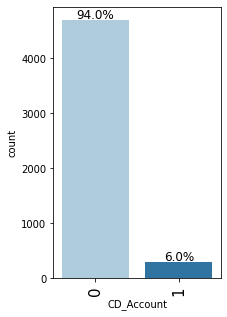

<IPython.core.display.Javascript object>

In [653]:
labeled_barplot(data, "CD_Account", perc=True)

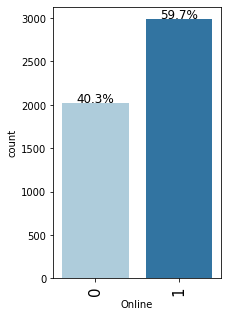

<IPython.core.display.Javascript object>

In [654]:
labeled_barplot(data, "Online", perc=True)

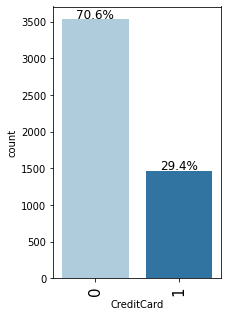

<IPython.core.display.Javascript object>

In [655]:
labeled_barplot(data, "CreditCard", perc=True)

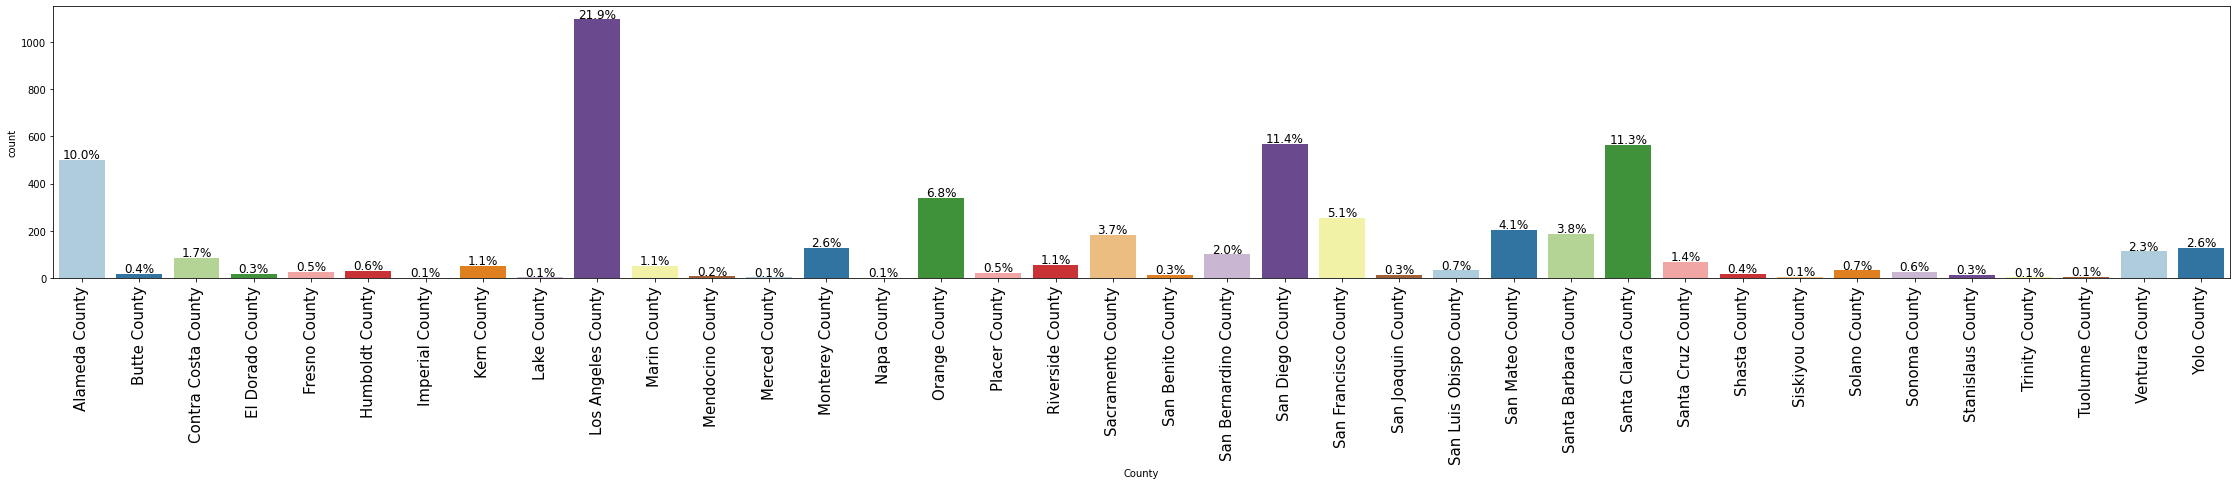

<IPython.core.display.Javascript object>

In [732]:
labeled_barplot(data, "County", perc=True)

## Bivariate Analysis

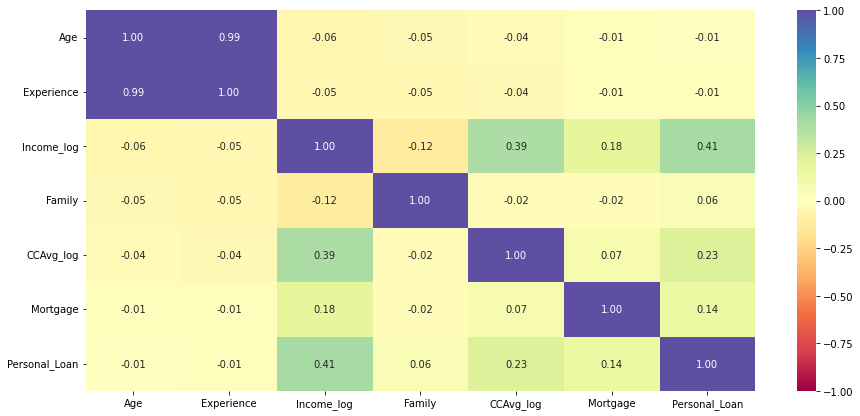

<IPython.core.display.Javascript object>

In [657]:
corr_cols = [
    "Age",
    "Experience",
    "Income_log",
    "Family",
    "CCAvg_log",
    "Mortgage",
    "Personal_Loan",
]

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

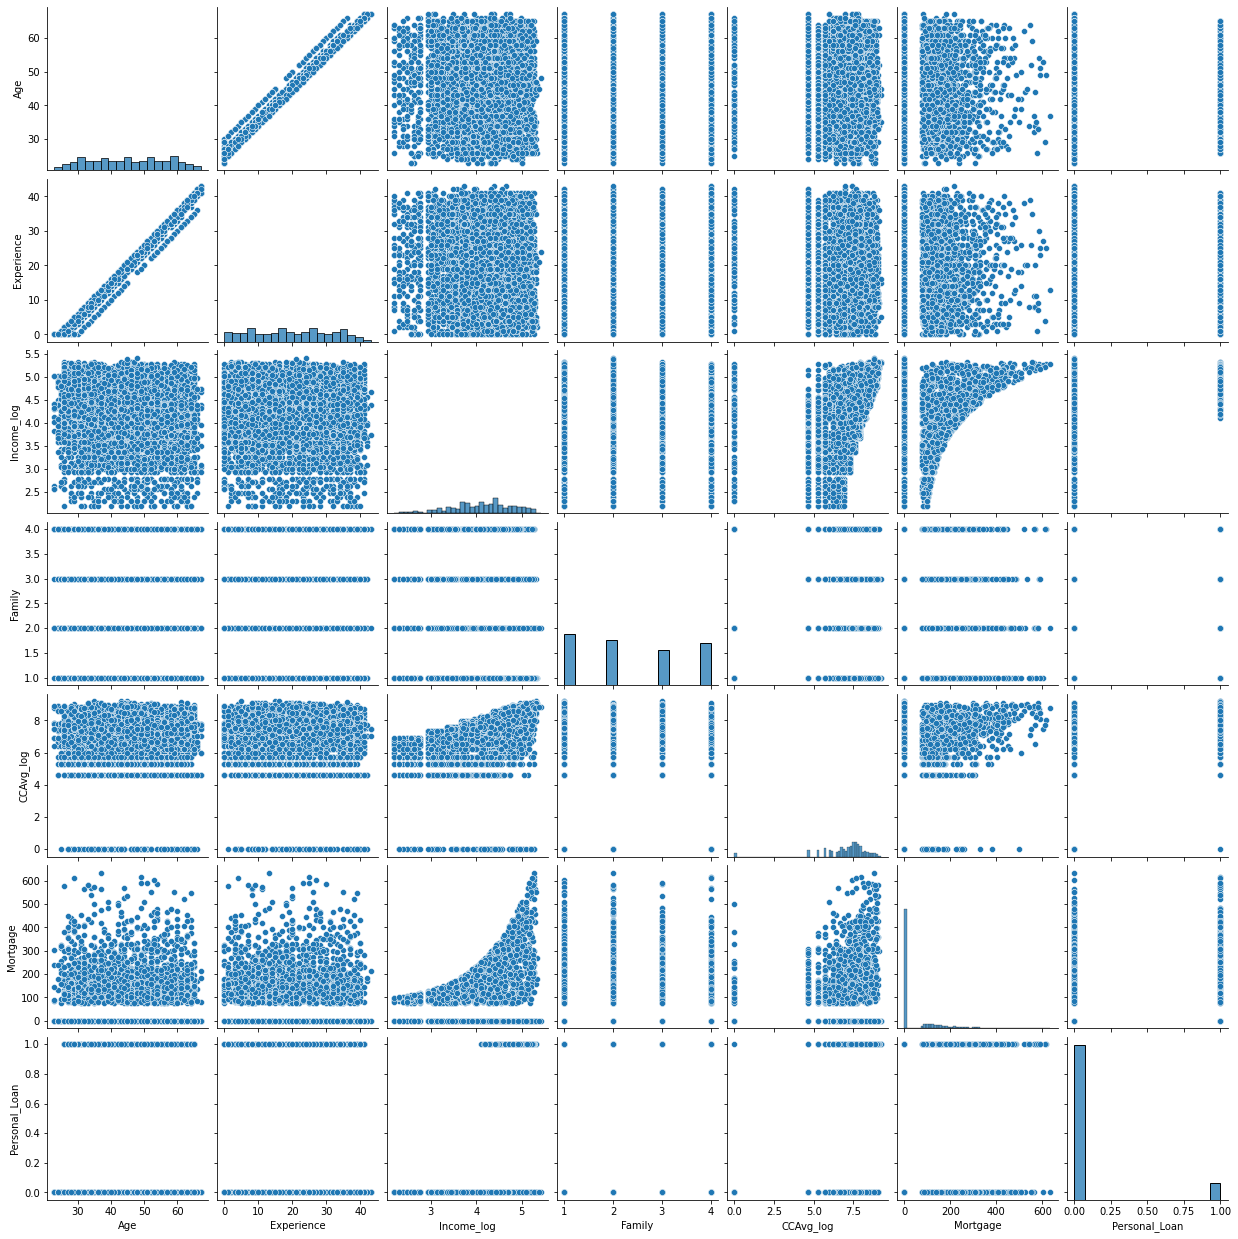

<IPython.core.display.Javascript object>

In [658]:
sns.pairplot(data=data[corr_cols], vars=corr_cols)

<AxesSubplot:xlabel='Education', ylabel='Income'>

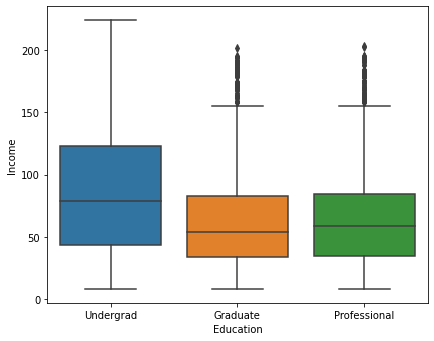

<IPython.core.display.Javascript object>

In [754]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Education", y="Income")

<AxesSubplot:xlabel='Education', ylabel='CCAvg'>

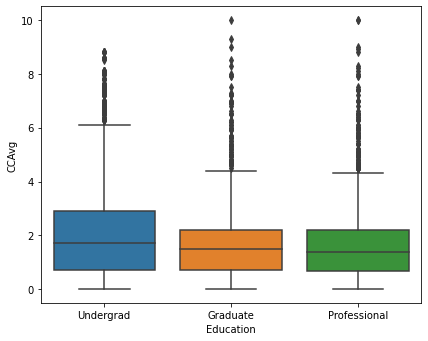

<IPython.core.display.Javascript object>

In [755]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Education", y="CCAvg")

<AxesSubplot:xlabel='Family', ylabel='Income'>

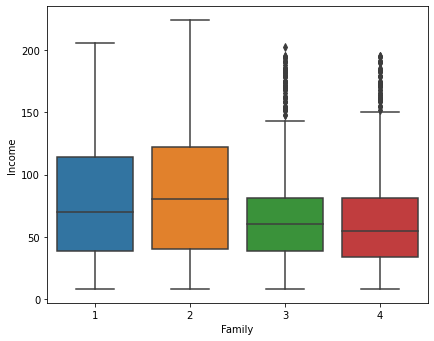

<IPython.core.display.Javascript object>

In [756]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Family", y="Income")

<AxesSubplot:xlabel='Personal_Loan', ylabel='Family'>

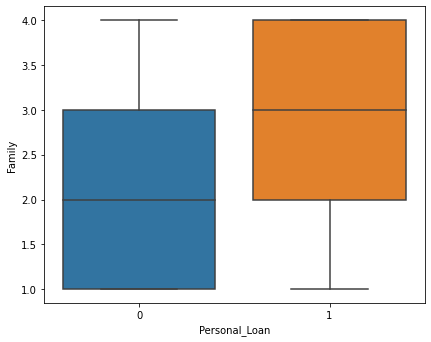

<IPython.core.display.Javascript object>

In [775]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Personal_Loan", y="Family")

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

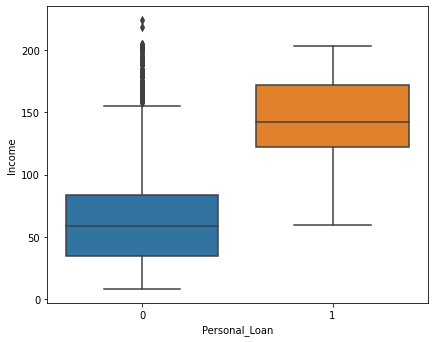

<IPython.core.display.Javascript object>

In [757]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Personal_Loan", y="Income")

<AxesSubplot:xlabel='Personal_Loan', ylabel='CCAvg'>

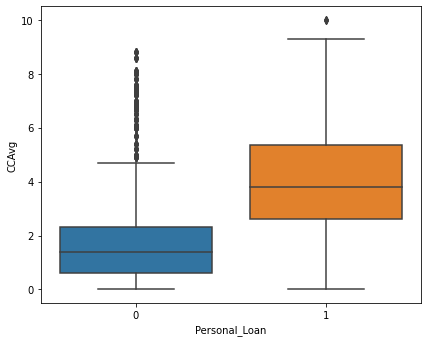

<IPython.core.display.Javascript object>

In [774]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Personal_Loan", y="CCAvg")

<AxesSubplot:xlabel='Age_bins', ylabel='Income'>

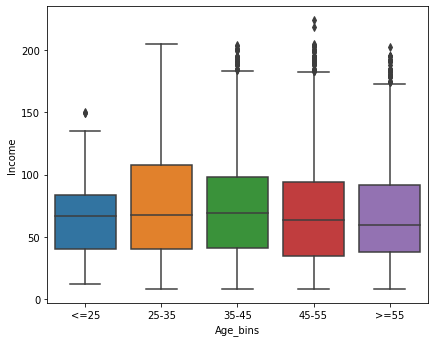

<IPython.core.display.Javascript object>

In [759]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x="Age_bins", y="Income")

In [659]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
Age_bins                      
All            4520  480  5000
>=55           1218  123  1341
45-55          1145  122  1267
25-35           965  118  1083
35-45          1152  117  1269
<=25             40    0    40
------------------------------------------------------------------------------------------------------------------------


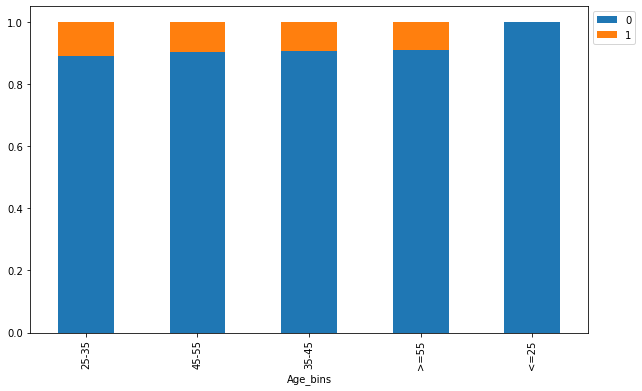

<IPython.core.display.Javascript object>

In [660]:
stacked_barplot(data, "Age_bins", "Personal_Loan")

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergrad      2003   93  2096
------------------------------------------------------------------------------------------------------------------------


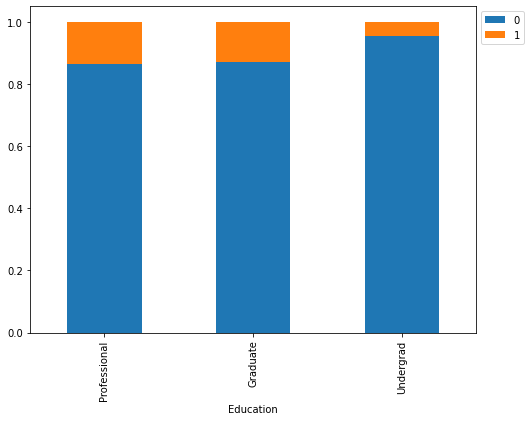

<IPython.core.display.Javascript object>

In [661]:
stacked_barplot(data, "Education", "Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


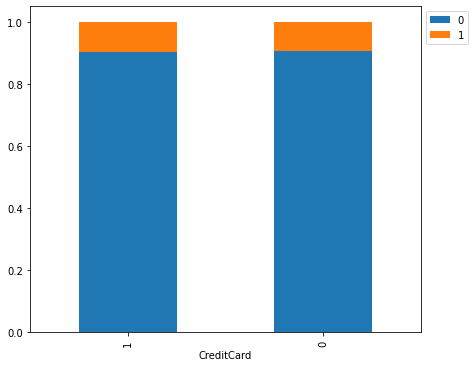

<IPython.core.display.Javascript object>

In [662]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


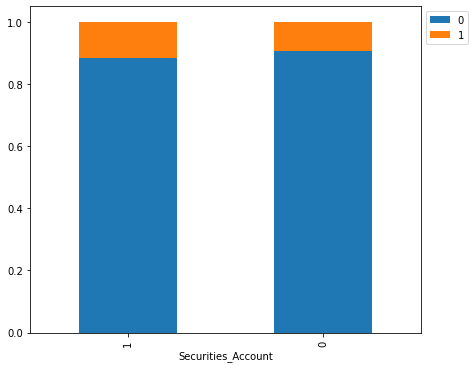

<IPython.core.display.Javascript object>

In [663]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


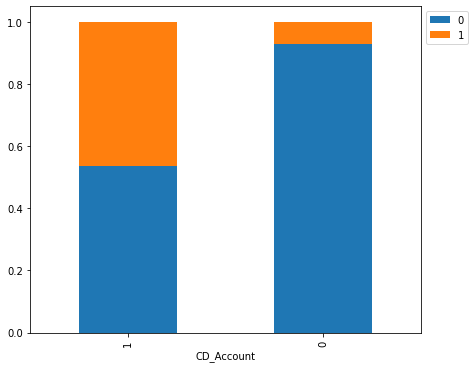

<IPython.core.display.Javascript object>

In [664]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


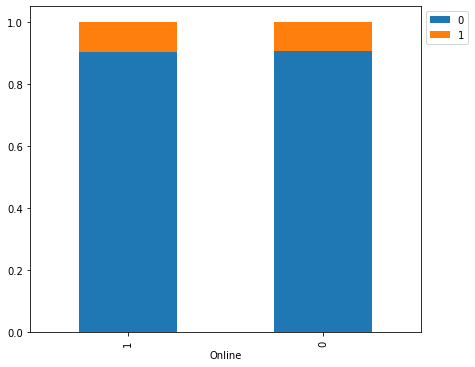

<IPython.core.display.Javascript object>

In [665]:
stacked_barplot(data, "Online", "Personal_Loan")

Personal_Loan              0    1   All
County                                 
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            309   30   339
San Francisco County     238   19   257
Monterey County          113   15   128
Sacramento County        169   15   184
Santa Barbara County     174   14   188
Contra Costa County       73   12    85
San Mateo County         192   12   204
Ventura County           103   11   114
Santa Cruz County         60    8    68
Yolo County              122    8   130
Kern County               47    7    54
Sonoma County             22    6    28
Marin County              48    6    54
Riverside County          50    6    56
San Luis Obispo County    28    5    33
Solano County             30    3    33
San Bernardino County     98    3   101
Shasta County             15    3    18


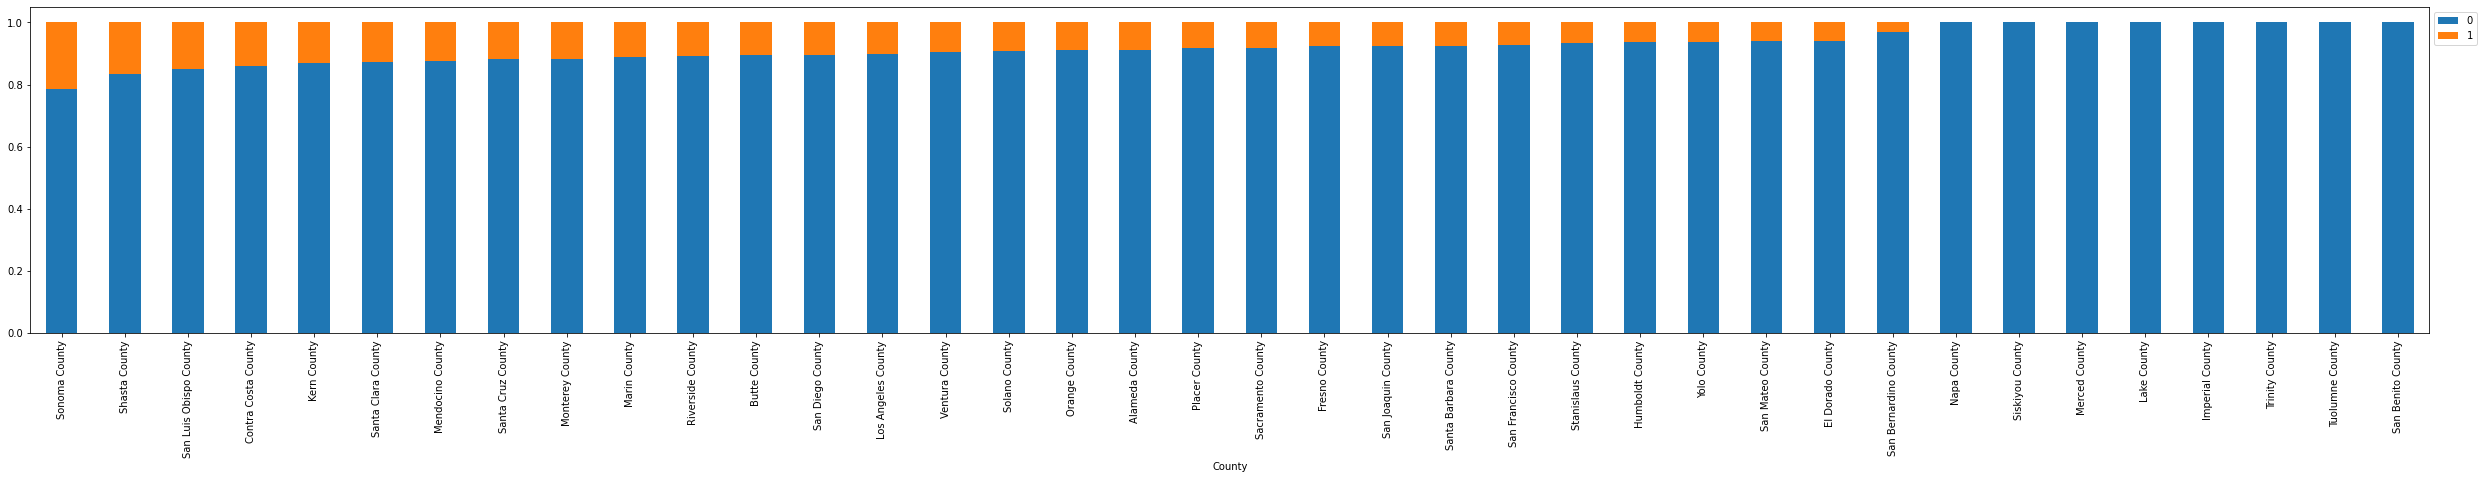

<IPython.core.display.Javascript object>

In [731]:
stacked_barplot(data, "County", "Personal_Loan")

In [777]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.00000
Experience,5000.0,20.119600,11.440484,0.000000,10.000000,20.000000,30.000000,43.00000
Income,5000.0,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.00000
ZIPCode,5000.0,93169.443200,1755.115774,90005.000000,91911.000000,93437.000000,94608.000000,96150.00000
Family,5000.0,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.00000
CCAvg,5000.0,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.00000
Mortgage,5000.0,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.00000
Personal_Loan,5000.0,0.096000,0.294621,0.000000,0.000000,0.000000,0.000000,1.00000
Securities_Account,5000.0,0.104400,0.305809,0.000000,0.000000,0.000000,0.000000,1.00000
CD_Account,5000.0,0.060400,0.238250,0.000000,0.000000,0.000000,0.000000,1.00000


<IPython.core.display.Javascript object>

## Summary of EDA

### Data Description

- There are no duplicated values in the data.
- There are no missing values in the data.
- Most of the data-types are either int64 or float64.
- There has been some -ve values in the Experience column which looks typo and were set to 0.
- Age column is divided into mulitple bins so to minimize the features during the model building

### Observations

- `Age`: Age looks normally distributed as mean and median are same which is 45 years. The min and max values are 23 and 67 respectively.

- `Experience`: Experience is highly correlated to Age and similarly normally distributed. During model building, we will drop experience as we aleady have age. The median and mean years are both 20 years.

- `Income`: Income is a bit right skewed as mean is greater than median. There are lots of outliers outside the 190k limit. Applied log transformation which help to bring distribution to normal.

- `ZIPCode`: The zipcode is converted to geographical county using python module.

- `Family`: The median size of the family is 2. We can see that the third quartile (Q3) is equal to 3 which 75% of the customers have either 3 or less family members.

- `CCAvg`: CCAvg is also slightly skewed to right since mean is greater than median. From boxplot, we can see there are quite a few outliers.

- `CrediCard`: This is a boolean type. 70% of the customers don't use credit.

- `Securities_Account`: Only 10% of the customers have securities account.

- `Online`: 60% of the customers go online use internet banking.

- `CD_Account`: Only 6% of the customers have CD account with this bank.


### Model evaluation criterion

### Model can make wrong predictions as:

- Predicting a liability customer will buy a loan but in reality the customer would not. - Loss of resources

- Predicting a liability customer will not buy a loan but in reality the customer would. - Loss of opportunity

### Which case is more important?

- If we predict a liability customer who was going to buy a personal loan as a customer who will not buy the personal loan.

### How to reduce this loss i.e need to reduce False Negatives?

- `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

## Model Building

In [667]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_log,CCAvg_log,Age_bins
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0,Los Angeles County,3.912023,7.378384,25-35
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0,Los Angeles County,3.555348,7.313887,45-55
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0,Alameda County,2.484907,6.908755,35-45
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0,San Francisco County,4.615121,7.901377,35-45
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1,Los Angeles County,3.828641,6.908755,35-45


<IPython.core.display.Javascript object>

In [668]:
data1 = data.drop(
    ["ZIPCode", "Age", "Experience", "Income", "CCAvg"], axis=1, inplace=False
)

<IPython.core.display.Javascript object>

In [669]:
data1.head()

,Family,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Income_log,CCAvg_log,Age_bins
0,4,Undergrad,0,0,1,0,0,0,Los Angeles County,3.912023,7.378384,25-35
1,3,Undergrad,0,0,1,0,0,0,Los Angeles County,3.555348,7.313887,45-55
2,1,Undergrad,0,0,0,0,0,0,Alameda County,2.484907,6.908755,35-45
3,1,Graduate,0,0,0,0,0,0,San Francisco County,4.615121,7.901377,35-45
4,4,Graduate,0,0,0,0,0,1,Los Angeles County,3.828641,6.908755,35-45


<IPython.core.display.Javascript object>

In [670]:
data1["Family"] = data1["Family"].astype("category")

<IPython.core.display.Javascript object>

### Define independent and dependent variables

In [671]:
X1 = data1.drop(["Personal_Loan"], axis=1)
y1 = data1["Personal_Loan"]

<IPython.core.display.Javascript object>

In [672]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Family              5000 non-null   category
 1   Education           5000 non-null   object  
 2   Mortgage            5000 non-null   int64   
 3   Personal_Loan       5000 non-null   int64   
 4   Securities_Account  5000 non-null   int64   
 5   CD_Account          5000 non-null   int64   
 6   Online              5000 non-null   int64   
 7   CreditCard          5000 non-null   int64   
 8   County              5000 non-null   object  
 9   Income_log          5000 non-null   float64 
 10  CCAvg_log           5000 non-null   float64 
 11  Age_bins            5000 non-null   category
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 400.9+ KB


<IPython.core.display.Javascript object>

### Creating Dummy Variables

In [673]:
X1 = pd.get_dummies(
    X1,
    columns=X1.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X1.head()

,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Income_log,CCAvg_log,Family_2,Family_3,Family_4,Education_Professional,Education_Undergrad,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County,Age_bins_25-35,Age_bins_35-45,Age_bins_45-55,Age_bins_>=55
0,0,1,0,0,0,3.912023,7.378384,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,3.555348,7.313887,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,2.484907,6.908755,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,4.615121,7.901377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,3.828641,6.908755,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [674]:
print("X1.shape = ", X1.shape)

X1.shape =  (5000, 53)


<IPython.core.display.Javascript object>

### Split the data into train and test

In [675]:
# splitting the data in 70:30 ratio for train to test data

x1_train, x1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.3, random_state=1
)

print("Number of rows in train data 1 =", x1_train.shape[0])
print("Number of rows in test data 1 =", x1_test.shape[0])

Number of rows in train data 1 = 3500
Number of rows in test data 1 = 1500


<IPython.core.display.Javascript object>

In [742]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [743]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Fitting a linear model

In [744]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(x1_train, y1_train)

<IPython.core.display.Javascript object>

In [745]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, x1_train.columns, columns=["coef"]).T

,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Income_log,CCAvg_log,Family_2,Family_3,Family_4,Education_Professional,Education_Undergrad,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County,Age_bins_25-35,Age_bins_35-45,Age_bins_45-55,Age_bins_>=55
coef,0.000838,-0.745214,2.9236,-0.466813,-0.848292,6.474301,0.545727,-0.06006,2.15626,1.255815,0.288545,-3.092147,-0.148512,0.098098,-0.094871,-0.072207,-0.147952,-0.003954,0.832486,-0.020375,-0.016079,0.237154,-0.227312,-0.020231,-0.094524,-0.00162,-0.016593,0.429343,1.096397,0.15215,-0.115553,-0.63911,0.050537,0.093069,0.011452,-0.291769,-0.811377,0.296249,0.088281,-0.062802,-0.228748,-0.055064,0.373003,0.493613,-0.268645,-0.074775,-0.083051,0.071919,-0.363722,-0.031345,0.184348,0.05437,0.140969


<IPython.core.display.Javascript object>

In [747]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x1_train.columns).T

,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Income_log,CCAvg_log,Family_2,Family_3,Family_4,Education_Professional,Education_Undergrad,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Ventura County,County_Yolo County,Age_bins_25-35,Age_bins_35-45,Age_bins_45-55,Age_bins_>=55
Odds,1.000838,0.474633,18.608163,0.626997,0.428145,648.266222,1.725862,0.941708,8.638764,3.510699,1.334485,0.045404,0.86199,1.103071,0.909491,0.930338,0.862473,0.996054,2.299028,0.979832,0.984049,1.267636,0.796672,0.979972,0.909806,0.998382,0.983544,1.536248,2.993361,1.164335,0.890873,0.527762,1.051836,1.097537,1.011518,0.746941,0.444246,1.344804,1.092295,0.939129,0.795529,0.946425,1.452089,1.638225,0.764415,0.927952,0.920304,1.074569,0.695084,0.969141,1.202434,1.055875,1.151389
Change_odd%,0.083790,-52.536741,1760.816283,-37.300279,-57.185460,64726.622189,72.586223,-5.829183,763.876394,251.069903,33.448473,-95.459562,-13.80103,10.307090,-9.050942,-6.966200,-13.752740,-0.394576,129.902800,-2.016844,-1.595075,26.763614,-20.332762,-2.002817,-9.019446,-0.161850,-1.645605,53.624789,199.336053,16.433491,-10.912651,-47.223782,5.183592,9.753695,1.151823,-25.305871,-55.575403,34.480430,9.229503,-6.087071,-20.447066,-5.357505,45.208877,63.822518,-23.558521,-7.204785,-7.969573,7.456863,-30.491582,-3.085859,20.243434,5.587497,15.138921


<IPython.core.display.Javascript object>

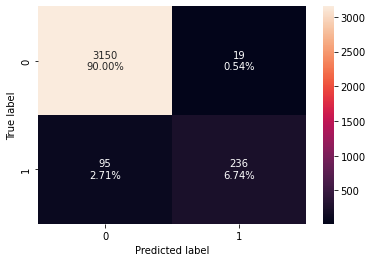

<IPython.core.display.Javascript object>

In [748]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x1_train, y1_train)

In [749]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, x1_train, y1_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.967429,0.712991,0.92549,0.805461


<IPython.core.display.Javascript object>

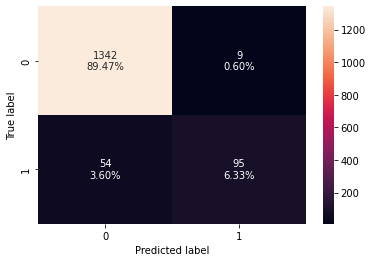

<IPython.core.display.Javascript object>

In [751]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x1_test, y1_test)

In [752]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, x1_test, y1_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.958,0.637584,0.913462,0.750988


<IPython.core.display.Javascript object>

- The recall value is low and can be further improved using by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [765]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y1_train, lg.predict_proba(x1_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.21889028108652406


<IPython.core.display.Javascript object>

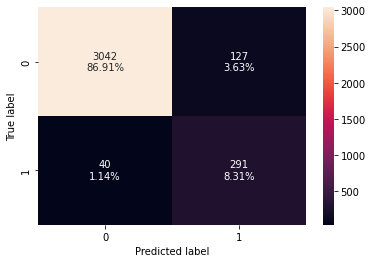

<IPython.core.display.Javascript object>

In [766]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x1_train, y1_train, threshold=optimal_threshold_auc_roc
)

In [767]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, x1_train, y1_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.952286,0.879154,0.696172,0.777036


<IPython.core.display.Javascript object>

- Model performance has improved significantly on training set.
- Model is giving a recall of 0.879 on the training set.

### check the performance on the test set

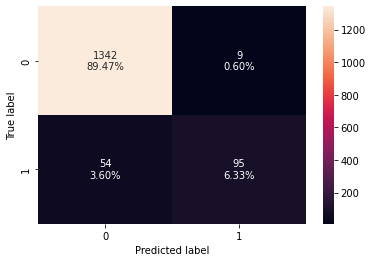

<IPython.core.display.Javascript object>

In [768]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x1_test, y1_test)

In [769]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, x1_test, y1_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.958,0.637584,0.913462,0.750988


<IPython.core.display.Javascript object>

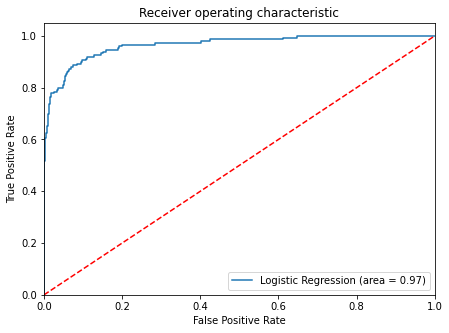

<IPython.core.display.Javascript object>

In [771]:
logit_roc_auc_test = roc_auc_score(y1_test, lg.predict_proba(x1_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y1_test, lg.predict_proba(x1_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

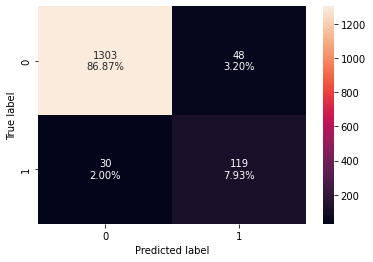

<IPython.core.display.Javascript object>

In [772]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x1_test, y1_test, threshold=optimal_threshold_auc_roc
)

In [773]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, x1_test, y1_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.948,0.798658,0.712575,0.753165


<IPython.core.display.Javascript object>

### Model performance check

- By changing the threshold of the logistic regression model we were able to see a significant improvement in the model performance.
- The model achieved a recall of 0.79 on the test set compared to the original value of 0.63.

In [682]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [685]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model

In [687]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(x1_train, y1_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [689]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, x1_train, y1_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

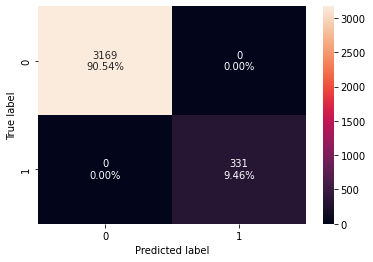

<IPython.core.display.Javascript object>

In [691]:
confusion_matrix_sklearn(model, x1_train, y1_train)

#### Checking model performance on test set

In [692]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, x1_test, y1_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.980667,0.872483,0.928571,0.899654


<IPython.core.display.Javascript object>

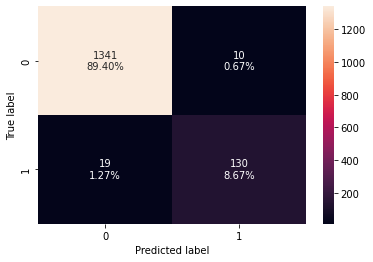

<IPython.core.display.Javascript object>

In [694]:
confusion_matrix_sklearn(model, x1_test, y1_test)

## Visualizing the Decision Tree

In [695]:
column_names = list(X1.columns)
feature_names = column_names
print(feature_names)

['Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Income_log', 'CCAvg_log', 'Family_2', 'Family_3', 'Family_4', 'Education_Professional', 'Education_Undergrad', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano C

<IPython.core.display.Javascript object>

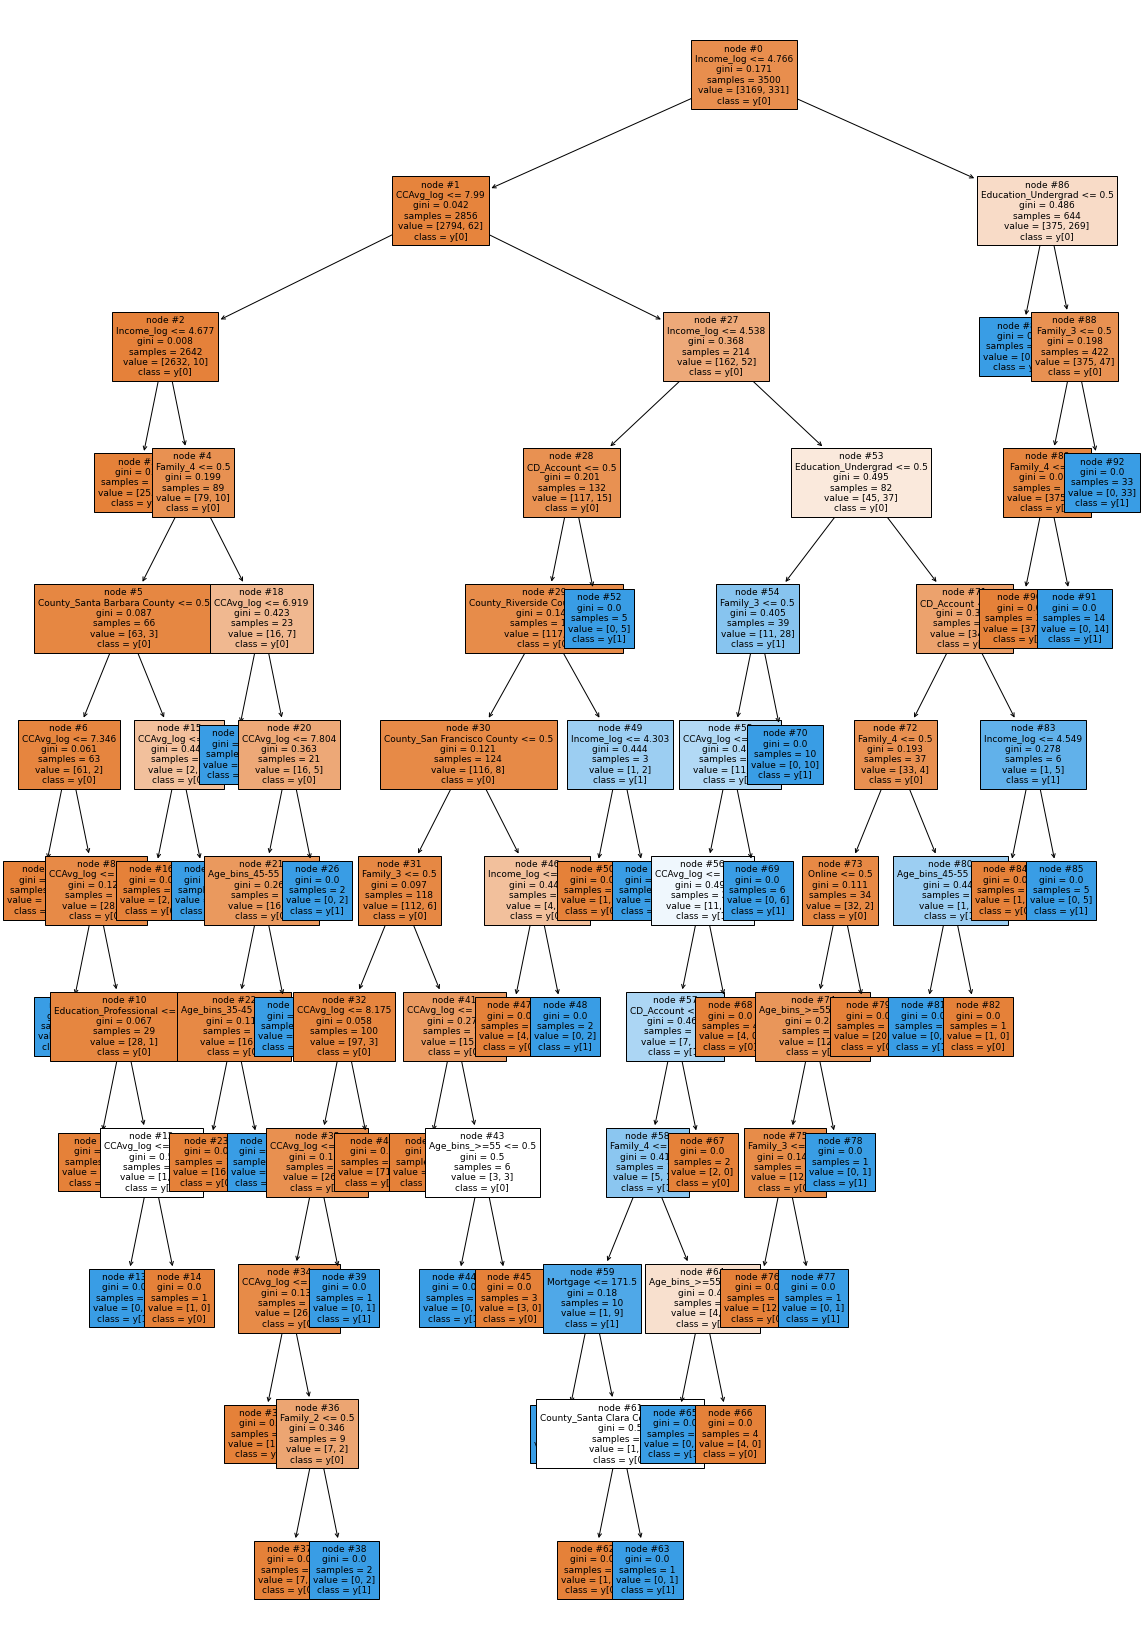

<IPython.core.display.Javascript object>

In [696]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Cost Complexity Pruning

In [709]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x1_train, y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [710]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000257,0.000514
2,0.000273,0.002151
3,0.000359,0.003226
4,0.000381,0.003607
5,0.000381,0.003988
6,0.000416,0.005651
7,0.000476,0.006127
8,0.000523,0.008741
9,0.000538,0.009279


<IPython.core.display.Javascript object>

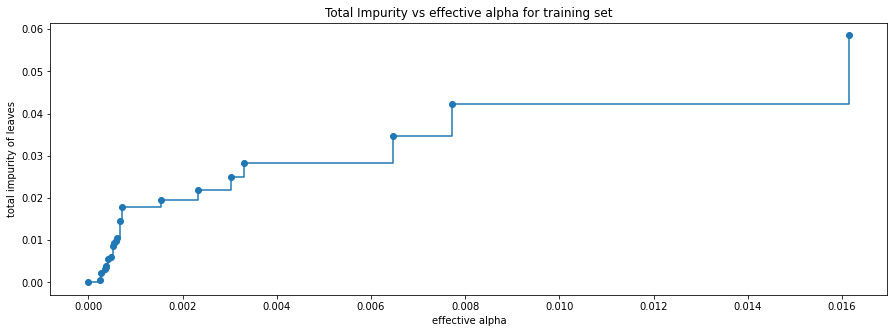

<IPython.core.display.Javascript object>

In [711]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [713]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x1_train, y1_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


<IPython.core.display.Javascript object>

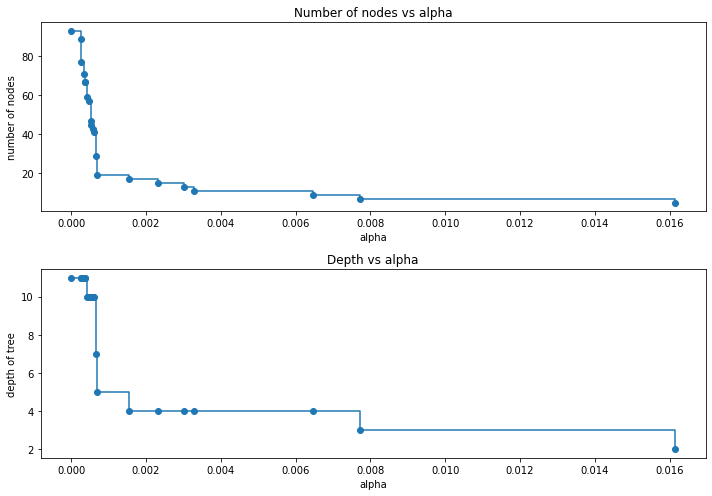

<IPython.core.display.Javascript object>

In [714]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall vs alpha for training and testing sets

In [717]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x1_train)
    values_train = recall_score(y1_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [718]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x1_test)
    values_test = recall_score(y1_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

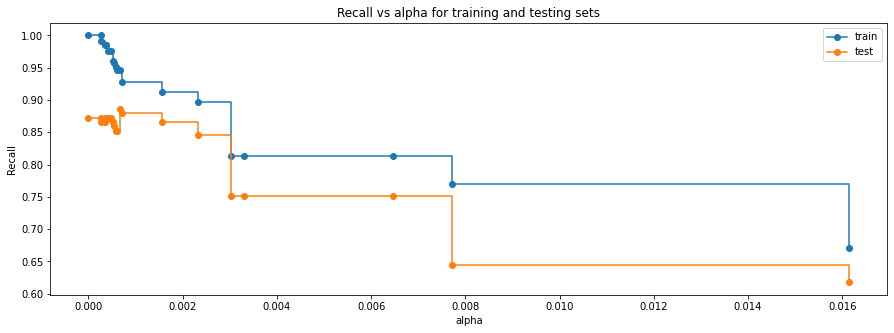

<IPython.core.display.Javascript object>

In [719]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [720]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006664224664224665, random_state=1)


<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [721]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, x1_train, y1_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.991429,0.945619,0.963077,0.954268


<IPython.core.display.Javascript object>

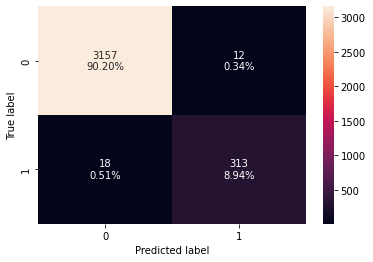

<IPython.core.display.Javascript object>

In [723]:
confusion_matrix_sklearn(best_model, x1_train, y1_train)

#### Checking model performance on test set

In [724]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, x1_test, y1_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.982,0.885906,0.929577,0.907216


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree

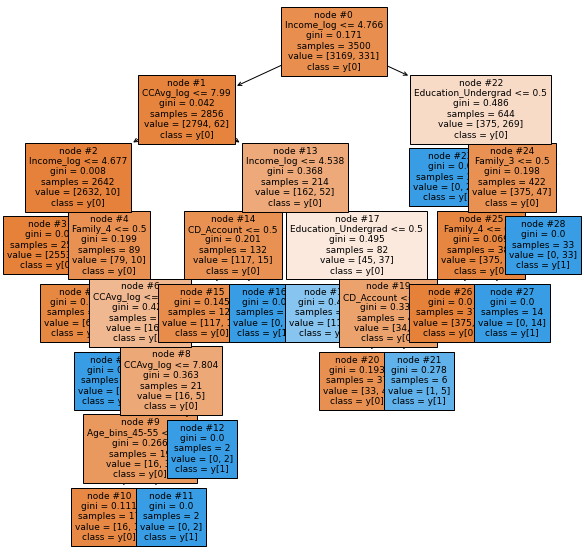

<IPython.core.display.Javascript object>

In [725]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [727]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x1_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Education_Undergrad            0.437945
Income_log                     0.325294
Family_3                       0.103029
Family_4                       0.053354
CCAvg_log                      0.049824
CD_Account                     0.024777
Age_bins_45-55                 0.005777
County_San Luis Obispo County  0.000000
County_Santa Cruz County       0.000000
County_Santa Clara County      0.000000
County_Santa Barbara County    0.000000
County_San Mateo County        0.000000
Mortgage                       0.000000
County_San Joaquin County      0.000000
County_Siskiyou County         0.000000
County_San Francisco County    0.000000
County_San Diego County        0.000000
County_Shasta County           0.000000
County_Trinity County          0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000
County_San Benito County       0.000000
County_Tuolumne County         0.000000


<IPython.core.display.Javascript object>

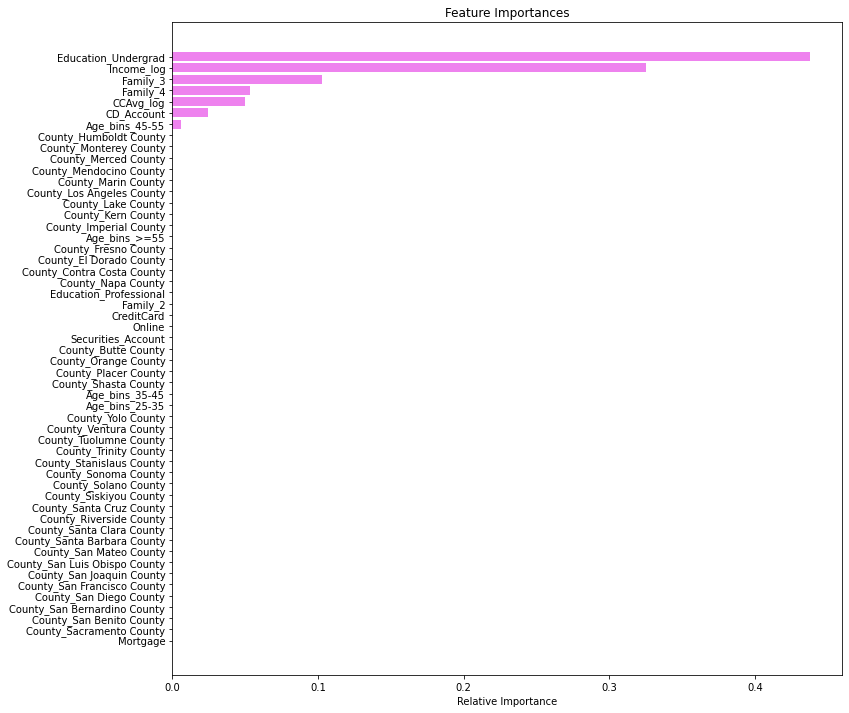

<IPython.core.display.Javascript object>

In [728]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparing all the decision tree models

In [761]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        # decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    # "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Post-Pruning)
Accuracy,1.0,0.991429
Recall,1.0,0.945619
Precision,1.0,0.963077
F1,1.0,0.954268


<IPython.core.display.Javascript object>

In [762]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        # decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    # "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Post-Pruning)
Accuracy,0.980667,0.982000
Recall,0.872483,0.885906
Precision,0.928571,0.929577
F1,0.899654,0.907216


<IPython.core.display.Javascript object>

### Conclusions

- We analyzed the loan modelling using logistic regression and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a liability customer buy a personal loan or not.
- The Decision tree showed much better performance in terms of recall.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Education_Undergrad, Income_log, Family >=3, CCAvg_log, CD_Account and Age_bins_45-55 are the most important variable in predicting the liability customers that will buy personal loan.
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

- From Decision Tree, we found that Education_Undergrad, Income_log, Family >=3, CCAvg_log are most important variables in predicting the liability customers that will buy the personal loan. 
    - Customers with higher income and credit card spending have shown to buy personal loan in the past. So they should be the focused group. 
    - Customers with education level Undergrad have shown to buy personal loan in the past compared to the other educational levels so they are another group that should be focused.
    - Around 45% of the customers who have CD account have shown to buy personal loan. So if the marketing team can increase the number of customers who have CD account, it will help to increase Bank's asset customers indirectly.
    - Also mature customers > 35 years of age with more professional experience have shown to be more into buying personal loa. This is another group that can be focused.
    - From anlysis, it is also observed that the customer which has a family size of >= 3 has shown to be more into buying personal loan. So the marketing team can target these kind of customers.